<a href="https://colab.research.google.com/github/gitraj666/Machine-Learning-Practise/blob/master/TensorFlow_Hand_Sign_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TensorFlow Classifer For Classifying Sign Language For Alphabets**

Dataset is in the local folder DeepL  
Ref:[Git](https://github.com/MElHussieni/Classification-of-Sign-Language-MNIST)
Things needed to be uploaded : 
 Datasets Folder
 tf_utils.py
 improv_utils.py

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline

A small view of the dataset and the labels which are associated
 can be viewed in the hands.png file ![alt text](drive/Colab Notebooks/Deep Learning/Tensor Flow Hand Digit Classifier/images/hands.png)

In [0]:
#function for loading the dataset
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) 
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) 

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) 
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:]) 
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
#Loading the dataset
X_train_org,Y_train_org,X_test_org,Y_test_org,classes = load_dataset()

y = [5]


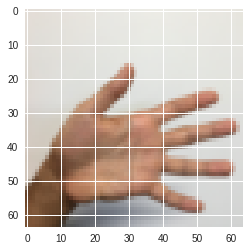

In [80]:
#Example of a picture
index = 0
plt.imshow(X_train_org[index])
print("y = "+str(Y_train_org[:,index]))

In [81]:
#Flatten the training and testing datasets to convert to one whole array instead of 2d matrix
X_train_flatten = X_train_org.reshape(X_train_org.shape[0],-1).T 
X_test_flatten = X_test_org.reshape(X_test_org.shape[0],-1).T 
X_train_flatten[0]  #sample data which is flattened

array([227, 238, 228, ..., 235, 233, 230], dtype=uint8)

In [82]:
#Normalising the images
X_train = X_train_flatten/255
X_test = X_test_flatten/255
X_train[0]  #sample normalised data

array([0.89019608, 0.93333333, 0.89411765, ..., 0.92156863, 0.91372549,
       0.90196078])

In [0]:
#Function for converting to one hot array for further reference look onehot.png
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [84]:
#Converting output of training and testing to one hot arrays
number_of_classes = 6  #Number 0 to Number 5
Y_train = convert_to_one_hot(Y_train_org,number_of_classes)
Y_test = convert_to_one_hot(Y_test_org,number_of_classes)
Y_train[0] #sample converted to one hot array

array([0., 1., 0., ..., 0., 0., 0.])

In [85]:
#Verifiying dimensions of all arrays
print("number of training examples = " + str(X_train.shape[1]))
print("number of test examples = " + str(X_test.shape[1]))
print("X_train shape: " + str(X_train.shape))
print("Y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("Y_test shape: " + str(Y_test.shape))
#64x64x3 = 12288

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


Building a TensorFlow Classifier  LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes.

**CREATING PLACEHOLDERS**</br>
Creating placeholders for variables whose value and datatype we are unaware of and can be used later on in the code


In [0]:
def create_placeholders(n_x,n_y):
  # n_x is the size  of the image ie (64x64x3=12288)
  # n_y is the size of the label vector (from 0 to 5 -> 6)
  X = tf.placeholder(tf.float32,[n_x, None],name="X")
  Y = tf.placeholder(tf.float32,[n_y, None],name="Y")
  
  return X,Y

In [87]:
X,Y = create_placeholders(12288,6)
print("X = "+str(X))
print("Y = "+str(Y))

X = Tensor("X_1:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


**Initialize Parameters**</br>
We initialize weights using xavier initializer which forms a uniform distribution and biases as zeros</br>
As our network consists of 3 layers there will be 3 sets of weights and biases

In [0]:
def initialize_parameters():
  """
  The shape of weights and baises are as follows
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
  """
  tf.set_random_seed(1)
  W1 = tf.get_variable("W1",[25,12288],initializer = tf.contrib.layers.xavier_initializer(seed=1))
  b1 = tf.get_variable("b1",[25,1],initializer = tf.zeros_initializer())
  W2 = tf.get_variable("W2",[12,25],initializer = tf.contrib.layers.xavier_initializer(seed=1))
  b2 = tf.get_variable("b2",[12,1],initializer = tf.zeros_initializer())
  W3 = tf.get_variable("W3",[6,12],initializer = tf.contrib.layers.xavier_initializer(seed=1))
  b3 = tf.get_variable("b3",[6,1],initializer = tf.zeros_initializer())
  # making a dictionary of parameters
  parameters = {
      "W1" : W1,
      "b1" : b1,
      "W2" : W2,
      "b2" : b2,
      "W3" : W3,
      "b3" : b3
  }
  
  return parameters

In [112]:
# running session to initialize parameters
tf.reset_default_graph()  # resetting the graph so as to not use the default weights
with tf.Session() as sess:
  parameters = initialize_parameters()
  print("W1 = "+ str(parameters["W1"]))
  print("b1 = "+ str(parameters["b1"]))
  print("W2 = "+ str(parameters["W2"]))
  print("b2 = "+ str(parameters["b2"]))
  
  

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


**Implementing Forward Propogation **</br>
LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX</br>
a1 = W*X + b</br>
a2 = relu(a1) .....

In [0]:
def forward_propagation(X, parameters):
  # getting the weights and biases from dictionary
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  W3 = parameters["W3"]
  b3 = parameters["b3"]
  
  Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
  A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
  Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
  A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
  Z3 = tf.add(tf.matmul(W3, A2), b3)  
  
  return Z3

In [114]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


**Computing the cost after forward pass**</br>
cross entropy softmax compares the logits and labels</br>
reduce mean sums the results

In [0]:
def compute_cost(Z3, Y):
  # to satisfy tensorflows requirements for logits and labels
  logits = tf.transpose(Z3)
  labels = tf.transpose(Y)
  
  cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= logits, labels = labels))
  
  return cost

In [0]:
def model(X_train,Y_train,X_test,Y_test,learning_rate=0.001,num_epochs=1500,minibatch_size=32,print_cost=True):
  ops.reset_default_graph()
  
  (n_x,m) = X_train.shape  # n_x:size of input m:no of training examples
  n_y = Y_train.shape[0]
  #print(Y_train.shape)
  costs = []
  
  #create placeholders
  X,Y = create_placeholders(n_x,n_y)
  
  parameters = initialize_parameters()
  
  tf.set_random_seed(1)                             # to keep consistent results
  seed = 3     
  Z3 = forward_propagation(X, parameters)
  
  cost = compute_cost(Z3, Y)
  
  optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
  
  init = tf.global_variables_initializer()
  
  with tf.Session() as sess:
    sess.run(init)
    
    # running the training loop
    for epoch in range(num_epochs):
      epoch_cost = 0    # defines cost for an epoch
      num_minibatches = int(m/minibatch_size) 
      seed = seed + 1
      minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed=0)
      
      for minibatch in minibatches:
        # select a minibatch
        (minibatch_X,minibatch_Y) = minibatch
      
        _,minibatch_cost = sess.run([optimizer,cost],feed_dict={X:minibatch_X,Y:minibatch_Y})
      
        epoch_cost += minibatch_cost/num_minibatches
      
      if print_cost==True and epoch%100==0:
        print("Cost after epoch: %i: %f" %(epoch,epoch_cost))
      if print_cost==True and epoch%5==0:
        costs.append(epoch_cost)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # lets save the parameters in a variable
    parameters = sess.run(parameters)
    print("Parameters have been trained!")

    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))

    return parameters

Cost after epoch: 0: 2.050992
Cost after epoch: 100: 0.824335
Cost after epoch: 200: 0.500920
Cost after epoch: 300: 0.381050
Cost after epoch: 400: 0.405493
Cost after epoch: 500: 0.246114
Cost after epoch: 600: 0.120891
Cost after epoch: 700: 0.181003
Cost after epoch: 800: 0.063409
Cost after epoch: 900: 0.105836
Cost after epoch: 1000: 0.105227
Cost after epoch: 1100: 0.089026
Cost after epoch: 1200: 0.051438
Cost after epoch: 1300: 0.074928
Cost after epoch: 1400: 0.032297


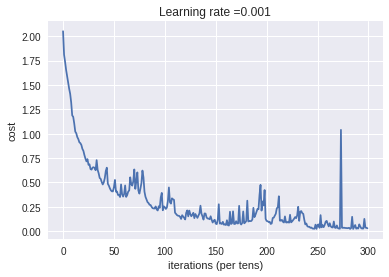

Parameters have been trained!
Train Accuracy: 0.9398148
Test Accuracy: 0.75


In [117]:
parameters = model(X_train,Y_train,X_test,Y_test)

In [0]:
def predict(X, parameters):
    
    W1 = tf.convert_to_tensor(parameters["W1"])
    b1 = tf.convert_to_tensor(parameters["b1"])
    W2 = tf.convert_to_tensor(parameters["W2"])
    b2 = tf.convert_to_tensor(parameters["b2"])
    W3 = tf.convert_to_tensor(parameters["W3"])
    b3 = tf.convert_to_tensor(parameters["b3"])
    
    params = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
    
    x = tf.placeholder("float", [12288, 1])
    
    z3 = forward_propagation_for_predict(x, params)
    p = tf.argmax(z3)
    
    sess = tf.Session()
    prediction = sess.run(p, feed_dict = {x: X})
        
    return prediction

def forward_propagation_for_predict(X, parameters):
    
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3'] 
                                                           # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)                      # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)                     # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Your algorithm predicts: y = 4


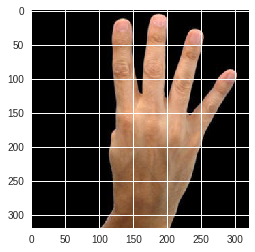

In [124]:
import scipy
from PIL import Image
from scipy import ndimage


my_image = "hands4.jpg"

fname =  my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Your algorithm predicts: y = 5


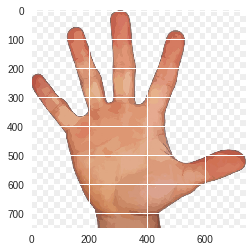

In [125]:
import scipy
from PIL import Image
from scipy import ndimage


my_image = "hands5.jpg"

fname =  my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/usr/local/lib/python3.6/dist-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Your algorithm predicts: y = 0


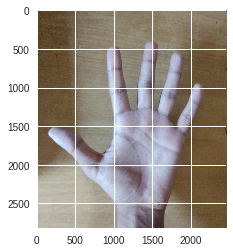

In [129]:
import scipy
from PIL import Image
from scipy import ndimage


my_image = "hands5_cam.jpg"

fname =  my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64, 64)).reshape((1, 64 * 64 * 3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))